## 00. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from pycaret.nlp import *
params = {"figure.facecolor": "#cad9e1",
              "axes.facecolor": "#cad9e1",
              "axes.grid" : True,
              "axes.grid.axis" : "y",
              "grid.color"    : "#ffffff",
              "grid.linewidth": 2,
              "axes.spines.left" : False,
              "axes.spines.right" : False,
              "axes.spines.top" : False,
              "ytick.major.size": 0,     
              "ytick.minor.size": 0,
              "xtick.direction" : "in",
              "xtick.major.size" : 7,
              "xtick.color"      : "#191919",
              "axes.edgecolor"    :"#191919",
              "axes.prop_cycle" : plt.cycler('color',
                                    ['#006767', '#ff7f0e', '#2ca02c', '#d62728',
                                     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                                     '#bcbd22', '#17becf'])}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
df=pd.read_csv('dayeon/Womens Clothing E-Commerce Reviews.csv')
df['Title']=df['Title'].fillna('')
df['combined_text'] = df['Title'] +' ' +df['Review Text'] # Combine Title and Review Text

In [4]:
# Pycaret NLP package was utilized for preprocessing.
# This does the following text cleaning
# It removes numeric&special charactes, performs tokenization,
# removes stopwords, extracts bigrams&trigrams, lemmatizes the corpus
exp_nlp101 = setup(data = df, target = 'combined_text', session_id = 123)

Description,Value
session_id,123
# Documents,23486
Vocab Size,9989
Custom Stopwords,False


In [5]:
# We vectorize the preprocessed corpus and put them into my_pd
vectorizer = CountVectorizer(max_features=1000)
sentences=[' '.join(i) for i in exp_nlp101[0]]
my_vec=vectorizer.fit_transform(sentences)
my_pd = pd.DataFrame(my_vec.toarray())
my_pd.columns = vectorizer.get_feature_names()
my_pd['label']=df['Recommended IND']
my_pd.sum().sort_values(ascending=False)

In [6]:
# my_pd is the processed dataset that represents a vectorized feature set
# and a label that indicates whether a product is recommended by the reviewer

In [7]:
# We put this into a pycaret classification module for training of the model
from pycaret.classification import *
exp_clf101 = setup(data = my_pd,
                   target = 'label',
                   session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(23486, 1001)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,1000
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [20]:
# Here, we compare the performance of untuned models and it is observed that 
# light gradient outperformed all the other models, with an AUC of 0.916
compare_models(fold=4,sort='AUC',round=3,blacklist=['knn','rbfsvm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.884000,0.916000,0.962000,0.903000,0.932000,0.551000
1,CatBoost Classifier,0.882000,0.911000,0.969000,0.896000,0.931000,0.524000
2,Logistic Regression,0.881000,0.902000,0.951000,0.909000,0.930000,0.557000
3,Extra Trees Classifier,0.872000,0.887000,0.976000,0.881000,0.926000,0.456000
4,Extreme Gradient Boosting,0.861000,0.885000,0.984000,0.866000,0.921000,0.368000
5,Gradient Boosting Classifier,0.864000,0.883000,0.980000,0.871000,0.922000,0.395000
6,Ada Boost Classifier,0.870000,0.878000,0.958000,0.892000,0.924000,0.486000
7,Linear Discriminant Analysis,0.867000,0.876000,0.936000,0.905000,0.920000,0.512000
8,Random Forest Classifier,0.859000,0.838000,0.948000,0.888000,0.917000,0.451000
9,Decision Tree Classifier,0.804000,0.669000,0.878000,0.884000,0.881000,0.338000


In [10]:
tuned_gbm =tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8923,0.9171,0.9571,0.9158,0.9360,0.5986
1,0.8826,0.9206,0.9497,0.9113,0.9301,0.5648
2,0.8844,0.9104,0.9571,0.9074,0.9316,0.5608
3,0.8838,0.9119,0.9593,0.9051,0.9314,0.5538
4,0.8923,0.9091,0.9549,0.9176,0.9358,0.6021
5,0.8838,0.9102,0.9564,0.9074,0.9312,0.5591
6,0.8905,0.9185,0.9534,0.9168,0.9347,0.5959
7,0.8881,0.9150,0.9645,0.9056,0.9341,0.5656
8,0.8887,0.9070,0.9645,0.9062,0.9344,0.5686
9,0.8954,0.9294,0.9615,0.9155,0.9380,0.6059


In [12]:
tuned_lr =tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8771,0.9019,0.9482,0.9066,0.9270,0.5412
1,0.8832,0.9125,0.9497,0.9119,0.9304,0.5677
2,0.8698,0.9000,0.9401,0.9053,0.9224,0.5210
3,0.8856,0.9062,0.9438,0.9193,0.9314,0.5887
4,0.8917,0.9122,0.9497,0.9211,0.9352,0.6072
5,0.8814,0.8997,0.9519,0.9083,0.9296,0.5552
6,0.8820,0.9106,0.9467,0.9130,0.9296,0.5670
7,0.8777,0.8963,0.9527,0.9039,0.9276,0.5360
8,0.8771,0.9008,0.9549,0.9015,0.9274,0.5288
9,0.8942,0.9183,0.9541,0.9201,0.9368,0.6116


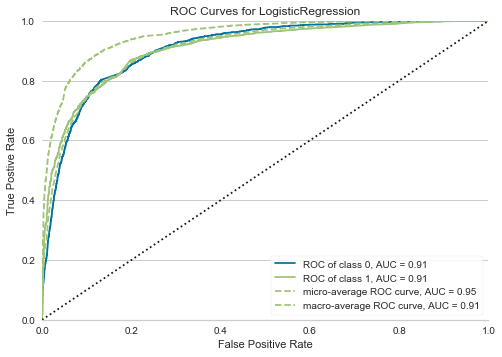

In [15]:
plot_model(tuned_lr, plot = 'auc')

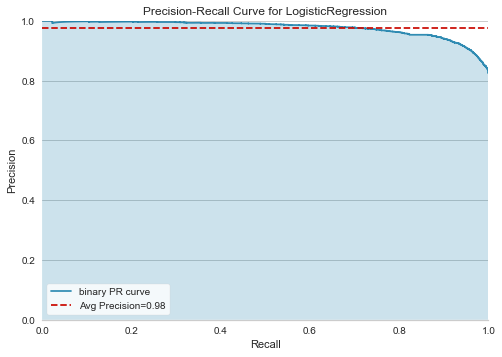

In [17]:
plot_model(tuned_lr, plot = 'pr')

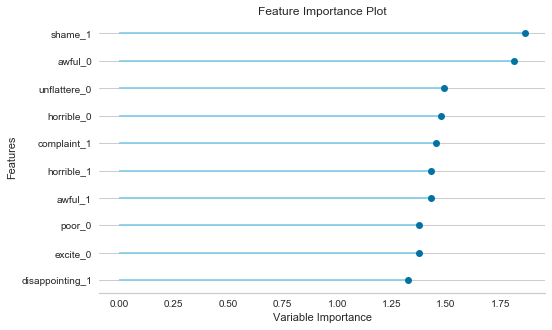

In [18]:
plot_model(tuned_lr, plot='feature')
#plot_model(tuned_lr, plot = 'pr')

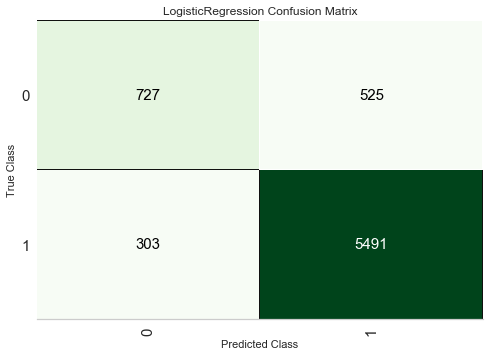

In [19]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [27]:
print([type(i) for i in exp_nlp101])
exp_nlp101[0][0]

[<class 'list'>, <class 'pandas.core.frame.DataFrame'>, <class 'list'>, <class 'gensim.corpora.dictionary.Dictionary'>, <class 'int'>, <class 'str'>, <class 'list'>]


['really',
 'want',
 'work',
 'initially',
 'order',
 'petite',
 'small',
 'usual',
 'size',
 'find',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reorder',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sew',
 'directly']

In [20]:
type(exp_nlp101[6])

list

In [5]:
lda=create_model('lda',num_topics=3,multi_core=True)

In [6]:
plot_model(lda, plot = 'topic_distribution')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
lda=create_model('lda',num_topics=5,multi_core=True)

In [12]:
plot_model()

In [13]:
plot_model(plot = 'bigram')

In [14]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 2')

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
from pycaret.nlp import *
exp_nlp101 = setup(data = df_neg, target = 'Review Text', session_id = 123)

Description,Value
session_id,123
# Documents,5278
Vocab Size,5269
Custom Stopwords,False


In [ ]:
lda=create_model('lda',num_topics=5,multi_core=True)

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:25:46
Status,. . . . . . . . . . . . . . . . . .,Fitting Topic Model


In [ ]:
#tuned_unsupervised = tune_model(model = 'lda', multi_core = True)